# Wine Scaling 🍷

---

![](https://cdn.foodandwineespanol.com/2018/07/kym-ellis-391585-unsplash.jpg)

---

We will explore a dataset containing wine characteristics and we will try to illustrate how important can be the **scaling preprocessing** step when training a Machine Learning on your model.

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
names = data.feature_names
target = data.target_names
X = data.data
y = data.target
X.shape, y.shape


((178, 13), (178,))

**Q1**. Describe briefly the data. Both qualitatively and statistically.

## Data description

In [3]:
#TODO: Data description
import pandas as pd
X = pd.DataFrame(X, columns = names)
y = pd.DataFrame(y, columns = ['target'])


In [4]:
#TODO: Data description
y.describe()

,target
count,178.000000
mean,0.938202
std,0.775035
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [5]:
#TODO: Data description
X.shape, y.shape

((178, 13), (178, 1))

In [6]:
#TODO: Data description
#X.isnull().sum()
#X.duplicated().sum()

**Q2**. Visualize on the same chart, all features profile by using `boxplot` method from seaborn

In [7]:
#TODO: Boxplot
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(X)
plt.show()

<Figure size 640x480 with 1 Axes>

## Data split

**Q2**. Split the data into a training set of 80% and a testing set of 20%. Set the `random_state` to 0 in order to get reproducible results.

In [8]:
#TODO: Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Data Classification (SVM classifier)

**Q3**. Fit a SVM classifier with a **rbf** kernel to this data and evaluate your accuracy on the test set.

In [9]:
#TODO: SVM
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5277777777777778

**Q4**. Terrible... 🙈. If we read carefully scikit-learn, it says:
> Support Vector Machine algorithms are **not scale invariant**, so it is highly recommended to scale your data. 

Let's do so then!

- Describe 3 differents methods that you can use to scale your data
- Choose one of them, and apply it to your data. Transform your data so that you obtain a X_scaled dataset.

## Data scaling

In [10]:
#TODO: Data scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X, y)

X_scaled = scaler.transform(X)
#X = pd.DataFrame(X_scaled, columns = names)

## visualizing data

**Q5**. Your data should now be scaled. Verify it by visualizing in the features profile with `sns.boxplot`.

Does it look better?

In [12]:
#TODO: Boxplot scaled

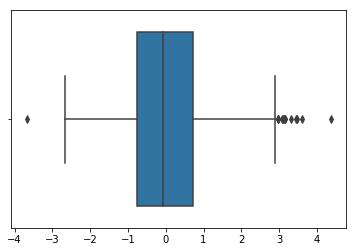

In [13]:
sns.boxplot(X_scaled)
plt.show()

## SVM scaled

**Q6**. Now let's give SVM another chance. Split your data into training/testing as you did before, train a SVM model (with rbf kernel) and evaluate your accuracy. What can you say? 🙂

In [54]:
#TODO: SVM scaled
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
#TODO: SVM scaled
#TODO: SVM
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
acc = clf.score(X_test, y_test)
acc

/home/wafa/bin/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0